In [1]:
# comment out below if seaborn is not annotating every square with
# the correlation
# !pip install seaborn --upgrade

In [2]:
#Import neccessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#Import the pokemon data
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pokemon.Legendary = le.fit_transform(pokemon.Legendary)
pokemon.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,0
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,0
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,0
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,0
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,0


In [5]:
#Import combat data for the pokemon
combat = pd.read_csv("combats.csv")
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [6]:
# Import type effectiveness chart
# This chart is used to check the a Pokemon's type against its opponent
type_chart = pd.read_csv('typecharteffectiveness.csv')
type_chart = type_chart.set_index('Attacking')
type_chart.head()

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Attacking,,,,,,,,,,,,,,,,,,
Normal,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0


In [7]:
extra_combat_df = combat
extra_combat_df.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [8]:
combat.shape

(50000, 3)

In [9]:
# This generator is used to help manage the iteration of a dataframe
def df_generator(df):
    for _, row in df.iterrows():
        yield row

In [10]:
# This is what the first instance in the new dataframe would look like
simple_gen = df_generator(combat)
poke_match = next(simple_gen)
# poke = pokemon[pokemon['#'] == first['First_pokemon']]
pokemon1 = pokemon.loc[poke_match['First_pokemon']-1]
pokemon2 = pokemon.loc[poke_match['Second_pokemon']-1]
example_instance = {}
# print(poke1['Type 1'])
# print(poke2['Type 2'])
example_instance['effectivenessOfFirstPokemon'] = type_chart[pokemon1['Type 1']][pokemon2['Type 1']]
example_instance['effectivenessOfSecondPokemon'] = type_chart[pokemon2['Type 1']][pokemon1['Type 1']]
example_instance['HP_diff'] = pokemon1['HP'] - pokemon2['HP']
example_instance['Attack_diff'] = pokemon1['Attack'] - pokemon2['Attack']
example_instance['Defense_diff'] = pokemon1['Defense'] - pokemon2['Defense']
example_instance['Sp.Atk_diff'] = pokemon1['Sp. Atk'] - pokemon2['Sp. Atk']
example_instance['Sp.Def_diff'] = pokemon1['Sp. Def'] - pokemon2['Sp. Def']
example_instance['Speed_diff'] = pokemon1['Speed'] - pokemon2['Speed']
example_instance['F_Legendary'] = pokemon1['Legendary']
example_instance['S_Legendary'] = pokemon2['Legendary']
example_instance['FirstIsWinner'] = 1 if poke_match['First_pokemon'] == poke_match['Winner'] else 0
example_instance

{'effectivenessOfFirstPokemon': 2.0,
 'effectivenessOfSecondPokemon': 1.0,
 'HP_diff': -20,
 'Attack_diff': -6,
 'Defense_diff': 10,
 'Sp.Atk_diff': -15,
 'Sp.Def_diff': 10,
 'Speed_diff': -19,
 'F_Legendary': 0,
 'S_Legendary': 0,
 'FirstIsWinner': 0}

In [11]:
# This is used to make a list of Series with the difference in stats between the pokemon in the combats.csv
# first_poke(features) - second_poke(features) = battle_stats
my_list = []
for row in df_generator(combat):
    dict_battle_stats = {}
    first_poke = pokemon.loc[row['First_pokemon']-1]
    second_poke = pokemon.loc[row['Second_pokemon']-1]
    f_type = first_poke['Type 1']
    s_type = second_poke['Type 1']
    dict_battle_stats['effectivenessOfFirstPokemon'] = type_chart[f_type][s_type]
    dict_battle_stats['effectivenessOfSecondPokemon'] = type_chart[s_type][f_type]
    dict_battle_stats['HP_diff'] = first_poke['HP'] - second_poke['HP']
    dict_battle_stats['Attack_diff'] = first_poke['Attack'] - second_poke['Attack']
    dict_battle_stats['Defense_diff'] = first_poke['Defense'] - second_poke['Defense']
    dict_battle_stats['Sp.Atk_diff'] = first_poke['Sp. Atk'] - second_poke['Sp. Atk']
    dict_battle_stats['Sp.Def_diff'] = first_poke['Sp. Def'] - second_poke['Sp. Def']
    dict_battle_stats['Speed_diff'] = first_poke['Speed'] - second_poke['Speed']
    dict_battle_stats['F_Legendary'] = first_poke['Legendary']
    dict_battle_stats['S_Legendary'] = second_poke['Legendary']
    dict_battle_stats['FirstIsWinner'] = 1 if row['First_pokemon'] == row['Winner'] else 0
    new_series = pd.Series(dict_battle_stats)
    my_list.append(new_series)

In [12]:
# This is used to make a Dataframe from the recently created list
extra_feats_df = pd.DataFrame(my_list, columns=['effectivenessOfFirstPokemon', 'effectivenessOfSecondPokemon', 'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'F_Legendary', 'S_Legendary', 'FirstIsWinner'])
extra_feats_df.head(10)

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
0,2.0,1.0,-20.0,-6.0,10.0,-15.0,10.0,-19.0,0.0,0.0,0.0
1,1.0,2.0,0.0,-39.0,-18.0,18.0,39.0,0.0,1.0,1.0,0.0
2,1.0,1.0,-20.0,-35.0,10.0,-45.0,10.0,0.0,0.0,0.0,0.0
3,1.0,0.5,-37.0,-80.0,-50.0,10.0,-50.0,-28.0,0.0,0.0,0.0
4,1.0,2.0,50.0,50.0,-105.0,105.0,-160.0,50.0,0.0,0.0,1.0
5,1.0,0.5,-10.0,-3.0,-100.0,7.0,-100.0,5.0,0.0,0.0,1.0
6,1.0,1.0,-25.0,0.0,10.0,-45.0,-50.0,-25.0,0.0,0.0,0.0
7,1.0,0.0,-80.0,-20.0,-70.0,-65.0,-85.0,-55.0,0.0,1.0,0.0
8,1.0,1.0,0.0,12.0,28.0,-23.0,-28.0,-29.0,0.0,0.0,0.0
9,2.0,1.0,5.0,-25.0,-10.0,5.0,-20.0,-5.0,0.0,0.0,0.0


In [13]:
# change types to correct types
extra_feats_df['HP_diff'] = extra_feats_df['HP_diff'].astype(int)
extra_feats_df['Attack_diff'] = extra_feats_df['Attack_diff'].astype(int)
extra_feats_df['Defense_diff'] = extra_feats_df['Defense_diff'].astype(int)
extra_feats_df['Sp.Atk_diff'] = extra_feats_df['Sp.Atk_diff'].astype(int)
extra_feats_df['Sp.Def_diff'] = extra_feats_df['Sp.Def_diff'].astype(int)
extra_feats_df['Speed_diff'] = extra_feats_df['Speed_diff'].astype(int)
extra_feats_df['F_Legendary'] = extra_feats_df['F_Legendary'].astype(int)
extra_feats_df['S_Legendary'] = extra_feats_df['S_Legendary'].astype(int)
extra_feats_df['FirstIsWinner'] = extra_feats_df['FirstIsWinner'].astype(int)
extra_feats_df.head(10)

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
0,2.0,1.0,-20,-6,10,-15,10,-19,0,0,0
1,1.0,2.0,0,-39,-18,18,39,0,1,1,0
2,1.0,1.0,-20,-35,10,-45,10,0,0,0,0
3,1.0,0.5,-37,-80,-50,10,-50,-28,0,0,0
4,1.0,2.0,50,50,-105,105,-160,50,0,0,1
5,1.0,0.5,-10,-3,-100,7,-100,5,0,0,1
6,1.0,1.0,-25,0,10,-45,-50,-25,0,0,0
7,1.0,0.0,-80,-20,-70,-65,-85,-55,0,1,0
8,1.0,1.0,0,12,28,-23,-28,-29,0,0,0
9,2.0,1.0,5,-25,-10,5,-20,-5,0,0,0


In [14]:
extra_feats_df.shape

(50000, 11)

In [15]:
extra_combat_df = pd.concat([extra_combat_df, extra_feats_df], axis='columns')
extra_combat_df

,First_pokemon,Second_pokemon,Winner,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
0,266,298,298,2.0,1.0,-20,-6,10,-15,10,-19,0,0,0
1,702,701,701,1.0,2.0,0,-39,-18,18,39,0,1,1,0
2,191,668,668,1.0,1.0,-20,-35,10,-45,10,0,0,0,0
3,237,683,683,1.0,0.5,-37,-80,-50,10,-50,-28,0,0,0
4,151,231,151,1.0,2.0,50,50,-105,105,-160,50,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,707,126,707,0.5,1.0,70,80,30,80,95,30,1,0,1
49996,589,664,589,0.0,2.0,25,30,0,-15,5,8,0,0,1
49997,303,368,368,1.0,1.0,-13,-65,40,25,10,-25,0,0,0
49998,109,89,109,0.5,0.5,15,-5,-20,-40,0,55,0,0,1


In [16]:
# uncomment if you need to test

# first_poke = pokemon[pokemon['#'] == 266]
# second_poke = pokemon[pokemon['#'] == 298]
# fake_df2 = pd.DataFrame(columns=['Effectiveness', 'HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff', 'F_Legendary', 'S_Legendary'])
# li_battle_stats2 = {}
# f_type = first_poke['Type 1'].to_string(index=False)
# s_type = second_poke['Type 1'].to_string(index=False)
# li_battle_stats2['Effectiveness'] = float(type_chart[type_chart['Attacking'] == f_type][s_type].to_string(index=False))
# li_battle_stats2['HP_diff'] = int(first_poke['HP'].to_string(index=False)) - int(second_poke['HP'].to_string(index=False))
# li_battle_stats2['Attack_diff'] = int(first_poke['Attack'].to_string(index=False)) - int(second_poke['Attack'].to_string(index=False))
# li_battle_stats2['Defense_diff'] = int(first_poke['Defense'].to_string(index=False)) - int(second_poke['Defense'].to_string(index=False))
# li_battle_stats2['Sp.Atk_diff'] = int(first_poke['Sp. Atk'].to_string(index=False)) - int(second_poke['Sp. Atk'].to_string(index=False))
# li_battle_stats2['Sp.Def_diff'] = int(first_poke['Sp. Def'].to_string(index=False)) - int(second_poke['Sp. Def'].to_string(index=False))
# li_battle_stats2['Speed_diff'] = int(first_poke['Speed'].to_string(index=False)) - int(second_poke['Speed'].to_string(index=False))
# li_battle_stats2['F_Legendary'] = bool(first_poke['Legendary'].to_string(index=False))
# li_battle_stats2['S_Legendary'] = bool(second_poke['Legendary'].to_string(index=False))
# new_series = pd.Series(li_battle_stats2)
# fake_df2 = fake_df2.append(new_series, ignore_index=True)
# fake_df2

In [17]:
#Using describe function to show mean, min, max, etc...
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


# Preprocessing

### Cleaning up missing and duplicate data

In [18]:
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [19]:
print(pokemon[pokemon['Name'].isnull()])

     # Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
62  63  NaN  Fighting    NaN  65     105       60       60       70     95   

    Generation  Legendary  
62           1          0  


In [20]:
pokemon.at[61, 'Name']

'Mankey'

In [21]:
#62 should be the evolution of 61. 61 is Mankey, and Primeape is the evolved version of Mankey
#Knowing this, set the name of 62 to Primeape.
pokemon.at[62, 'Name'] = "Primeape"

In [22]:
#Keep only the first of duplicate records for the pokemon and combat files
pokemon.duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool

In [23]:
#Check for any null data in the combat file
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [24]:
combat.duplicated(keep='first')

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997     True
49998    False
49999    False
Length: 50000, dtype: bool

### Finding the win percentage, and merging win percentage with Pokemon data

In [25]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [26]:
#Count the number of wins by each Pokemon
wins = combat.groupby('Winner').count()
#Drop the Second_pokemon column
wins = wins.drop('Second_pokemon', axis = 1)
#Rename First_pokemon column to Number_of_wins
wins = wins.rename(columns={'First_pokemon': 'Number_of_wins'})
wins

,Number_of_wins
Winner,
1,37
2,46
3,89
4,70
5,55
...,...
796,39
797,116
798,60


In [27]:
# Get the count of battles for the first and second pokemon in the combat csv
firstPokemonCount = combat.groupby('Second_pokemon').count()
secondPokemonCount = combat.groupby('First_pokemon').count()
# Add the resulting counts together to get the total battles, add the results to wins
wins['Num_Fights'] = firstPokemonCount.Winner + secondPokemonCount.Winner
# Get the win % and add the results to wins table
wins['Win_%'] = wins.Number_of_wins/wins['Num_Fights']
wins

,Number_of_wins,Num_Fights,Win_%
Winner,,,
1,37,133,0.278195
2,46,121,0.380165
3,89,132,0.674242
4,70,125,0.560000
5,55,112,0.491071
...,...,...,...
796,39,105,0.371429
797,116,131,0.885496
798,60,119,0.504202


In [28]:
# Merge the wins table with the original Pokemon data
result = pd.merge(pokemon, wins, left_on='#', right_index = True, how = 'left')
result.columns = result.columns.str.strip()
result

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Number_of_wins,Num_Fights,Win_%
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,37.0,133.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,46.0,121.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,89.0,132.0,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,70.0,125.0,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,0,55.0,112.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,1,39.0,105.0,0.371429
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,1,116.0,131.0,0.885496
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,1,60.0,119.0,0.504202
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,1,89.0,144.0,0.618056


In [29]:
# Create new table showing Pokemon stats and their correlated win percentage
feats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_%']
corr = result[feats]
corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_%
0,45,49,49,65,65,45,0.278195
1,60,62,63,80,80,60,0.380165
2,80,82,83,100,100,80,0.674242
3,80,100,123,122,120,80,0.560000
4,39,52,43,60,50,65,0.491071
...,...,...,...,...,...,...,...
795,50,100,150,100,150,50,0.371429
796,50,160,110,160,110,110,0.885496
797,80,110,60,150,130,70,0.504202
798,80,160,60,170,130,80,0.618056


In [30]:
# Create a stats matrix, and visualize the data
df_corr = corr.corr()
df_corr

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win_%
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.258006
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.500181
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.129426
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.478940
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.324218
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.937742
Win_%,0.258006,0.500181,0.129426,0.478940,0.324218,0.937742,1.000000


<Axes: >

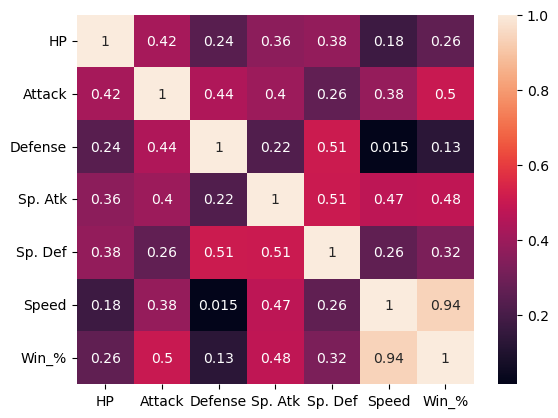

In [31]:
sn.heatmap(df_corr, annot=True)

In [32]:
# check for any missing data
fitting_df = result[feats]
fitting_df.isna().sum()

HP          0
Attack      0
Defense     0
Sp. Atk     0
Sp. Def     0
Speed       0
Win_%      17
dtype: int64

In [33]:
# These are the Pokemon with missing combat values
missing = result.drop('Type 2', axis='columns')
missing[missing.isna().any(axis='columns')]

,#,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Number_of_wins,Num_Fights,Win_%
11,12,Blastoise,Water,79,83,100,85,105,78,1,0,NaN,NaN,NaN
32,33,Sandshrew,Ground,50,75,85,20,30,40,1,0,NaN,NaN,NaN
45,46,Wigglytuff,Normal,140,70,45,85,50,45,1,0,NaN,NaN,NaN
65,66,Poliwag,Water,40,50,40,40,40,90,1,0,NaN,NaN,NaN
77,78,Victreebel,Grass,80,105,65,100,70,70,1,0,NaN,NaN,NaN
89,90,Magneton,Electric,50,60,95,120,70,70,1,0,NaN,NaN,NaN
143,144,Ditto,Normal,48,48,48,48,48,48,1,0,NaN,NaN,NaN
182,183,Ariados,Bug,70,90,70,60,60,40,2,0,NaN,NaN,NaN
230,231,Shuckle,Bug,20,10,230,10,230,5,2,0,NaN,NaN,NaN
235,236,Ursaring,Normal,90,130,75,75,75,55,2,0,NaN,NaN,NaN


In [34]:
# remove the ones with the missing data
fitting_df.dropna(inplace=True)
fitting_df.isna().sum()

C:\Users\odune\AppData\Local\Temp\ipykernel_19420\2033533013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fitting_df.dropna(inplace=True)


HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
Win_%      0
dtype: int64

In [35]:
fitting_df.shape

(783, 7)

In [36]:
X = fitting_df.drop(['Win_%'], axis='columns')
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


In [37]:
y = fitting_df['Win_%']
y.head()

0    0.278195
1    0.380165
2    0.674242
3    0.560000
4    0.491071
Name: Win_%, dtype: float64

In [38]:
# Splitting the dataframe into a Train set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [39]:
len(X_train)

587

In [40]:
len(X_test)

196

In [41]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [42]:
model_lr.score(X_test, y_test)

0.8958641315987457

In [43]:
from sklearn.metrics import mean_absolute_error

In [44]:
y_predicted = model_lr.predict(X_test)
mae = mean_absolute_error(y_test, y_predicted)
mae

0.059924071520257624

In [45]:
extra_feats_df.head()

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
0,2.0,1.0,-20,-6,10,-15,10,-19,0,0,0
1,1.0,2.0,0,-39,-18,18,39,0,1,1,0
2,1.0,1.0,-20,-35,10,-45,10,0,0,0,0
3,1.0,0.5,-37,-80,-50,10,-50,-28,0,0,0
4,1.0,2.0,50,50,-105,105,-160,50,0,0,1


# Normalize the Data

In [46]:
# features before Normalization (Min-Max Scaling)
extra_feats_df.describe()

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,1.030370,1.030270,-0.033020,0.085940,0.099940,0.229680,0.058580,-0.064800,0.08172,0.082040,0.472020
std,0.456998,0.456753,35.563921,46.158166,44.721925,46.182224,39.448164,41.340773,0.27394,0.274428,0.499221
min,0.000000,0.000000,-225.000000,-170.000000,-215.000000,-174.000000,-210.000000,-170.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,-20.000000,-30.000000,-26.000000,-30.000000,-25.000000,-29.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,20.000000,30.000000,27.000000,30.000000,25.000000,29.000000,0.00000,0.000000,1.000000
max,2.000000,2.000000,225.000000,180.000000,220.000000,179.000000,207.000000,165.000000,1.00000,1.000000,1.000000


In [47]:
featsToScale = ['HP_diff', 'Attack_diff', 'Defense_diff', 'Sp.Atk_diff', 'Sp.Def_diff', 'Speed_diff']
scaled_df = extra_feats_df

In [48]:
from sklearn.preprocessing import MinMaxScaler
min_maxScaler = MinMaxScaler(feature_range=(-1, 1))
min_maxScaler.fit(extra_feats_df[featsToScale])
scaled_df[featsToScale] = min_maxScaler.transform(extra_feats_df[featsToScale])

In [49]:
scaled_df.head(10)

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary,FirstIsWinner
0,2.0,1.0,-0.088889,-0.062857,0.034483,-0.099150,0.055156,-0.098507,0,0,0
1,1.0,2.0,0.000000,-0.251429,-0.094253,0.087819,0.194245,0.014925,1,1,0
2,1.0,1.0,-0.088889,-0.228571,0.034483,-0.269122,0.055156,0.014925,0,0,0
3,1.0,0.5,-0.164444,-0.485714,-0.241379,0.042493,-0.232614,-0.152239,0,0,0
4,1.0,2.0,0.222222,0.257143,-0.494253,0.580737,-0.760192,0.313433,0,0,1
5,1.0,0.5,-0.044444,-0.045714,-0.471264,0.025496,-0.472422,0.044776,0,0,1
6,1.0,1.0,-0.111111,-0.028571,0.034483,-0.269122,-0.232614,-0.134328,0,0,0
7,1.0,0.0,-0.355556,-0.142857,-0.333333,-0.382436,-0.400480,-0.313433,0,1,0
8,1.0,1.0,0.000000,0.040000,0.117241,-0.144476,-0.127098,-0.158209,0,0,0
9,2.0,1.0,0.022222,-0.171429,-0.057471,0.014164,-0.088729,-0.014925,0,0,0


In [50]:
X = scaled_df.drop(['FirstIsWinner'], axis='columns')
X.head()

,effectivenessOfFirstPokemon,effectivenessOfSecondPokemon,HP_diff,Attack_diff,Defense_diff,Sp.Atk_diff,Sp.Def_diff,Speed_diff,F_Legendary,S_Legendary
0,2.0,1.0,-0.088889,-0.062857,0.034483,-0.099150,0.055156,-0.098507,0,0
1,1.0,2.0,0.000000,-0.251429,-0.094253,0.087819,0.194245,0.014925,1,1
2,1.0,1.0,-0.088889,-0.228571,0.034483,-0.269122,0.055156,0.014925,0,0
3,1.0,0.5,-0.164444,-0.485714,-0.241379,0.042493,-0.232614,-0.152239,0,0
4,1.0,2.0,0.222222,0.257143,-0.494253,0.580737,-0.760192,0.313433,0,0


In [51]:
y = extra_feats_df['FirstIsWinner']
y

0        0
1        0
2        0
3        0
4        1
        ..
49995    1
49996    1
49997    0
49998    1
49999    1
Name: FirstIsWinner, Length: 50000, dtype: int32

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Hyper Tune Parameters

### Here we are trying to find the best model and the best parameters for that model

In [53]:
# This function is used for Hyper Paramter Tuning
from sklearn.model_selection import GridSearchCV

In [54]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [5, 8, 10]
        }
    }
}

In [55]:
# This is to keep track of all the model scores
model_scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X, y)
    model_scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [56]:
model_scores_df = pd.DataFrame(model_scores, columns=['model', 'best_score', 'best_params'])
model_scores_df

,model,best_score,best_params
0,random_forest,0.96382,{'n_estimators': 100}
1,logistic_regression,0.88284,{'C': 5}


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [58]:
len(X_train)

37500

In [59]:
len(X_test)

12500

# Modeling

### Apply Random Forest

In [60]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred_rfc = rfc.predict_proba(X_test)[:, 1]
rfc.score(X_test, y_test)

0.96432

### Apply Logistic Regression

In [62]:
# from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()

In [63]:
model_logreg.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred_logistic = model_logreg.decision_function(X_test)
model_logreg.score(X_test, y_test)

0.8828

# Plot ROC and Compare AUC

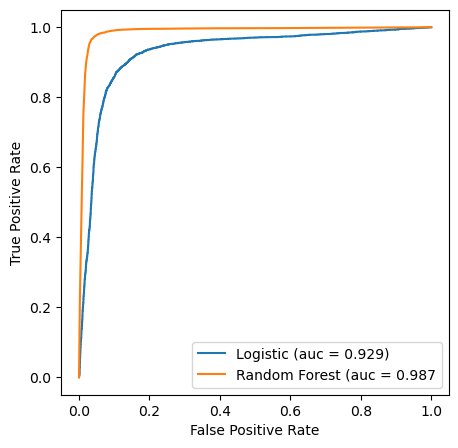

In [65]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Logistic Regression
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# Random Forest
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = roc_auc_score(y_test, y_pred_rfc)

plt.figure(figsize=(5,5))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic (auc = {auc_logistic:.03f})')
plt.plot(rfc_fpr, rfc_tpr, label=f'Random Forest (auc = {auc_rfc:.03f}')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

### Random Forest has the better score, ROC curve, and AUC so it will be used over the Logistic Regression

In [66]:
Solgaleo = {
    "Type 1": 'Psychic',
    'HP': 137,
    'Attack': 137,
    'Defense': 107,
    'Sp. Atk': 113,
    'Sp. Def': 89,
    'Speed': 97,
    'Legendary': 1,
}
Corvisquire = {
    "Type 1": 'Flying',
    'HP': 68,
    'Attack':67,
    'Defense': 55,
    'Sp. Atk': 43,
    'Sp. Def': 55,
    'Speed': 77,
    'Legendary': 0,
}

In [67]:
def pokemon_vs_dict(pokemon1, pokemon2):
    """
    pokemon_vs_dict(pokemon1, pokemon2)
    This function takes in two dictionaries, each holding the pokemons stats,
    and calculates the difference in each pokemons stats. Each dictionary is 
    required to have the stats Type 1, HP, Attack, Defense, Sp. Atk, Sp. Def,
    Speed and Legendary. No other keys should be there.

    params:

    pokemon1 - dict
    pokemon2 - dict

    returns:

    dict e.g. {effectivenessOfFirstPokemon:1.0, effectivenessOfSecondPokemon:0.5, HP_diff:-20, ...etc}
    """
    
    stats = {}
    # stats['Effectiveness'] = float(type_chart[type_chart['Attacking'] == poke1['Type 1']][poke2['Type 1']].to_string(index=False))
    stats['effectivenessOfFirstPokemon'] = type_chart[pokemon1['Type 1']][pokemon2['Type 1']]
    stats['effectivenessOfSecondPokemon'] = type_chart[pokemon2['Type 1']][pokemon1['Type 1']]
    stats['F_Legendary'] = pokemon1['Legendary']
    stats['S_Legendary'] = pokemon2['Legendary']
    for key, val in pokemon1.items():
        if key != 'Type 1' and key != 'Legendary':
#             print(f'{key} {val}')
            stats[key] = int(val - pokemon2[key])
    return stats

In [68]:
# 
def predict_pokemon_win(battle_stats):
    """
    predict_pokemon_win(battle_stats)
    This function takes in the a dictionary with the difference between two pokemon.
    It is assumed that the first pokemon is the pokemon we are trying to calculate
    the win rate for.

    params:

    battle_stats - dict

    returns:

    2D list e.g. [[loseRate, winRate]]
    """
    s_feats = [[battle_stats['HP'], battle_stats['Attack'], battle_stats['Defense'], battle_stats['Sp. Atk'], battle_stats['Sp. Def'], battle_stats['Speed']]]
    scaledStats = min_maxScaler.transform(s_feats)
    finalStats = [[battle_stats['effectivenessOfFirstPokemon'], battle_stats['effectivenessOfSecondPokemon'], scaledStats[0][0], scaledStats[0][1], scaledStats[0][2],
                   scaledStats[0][3], scaledStats[0][4], scaledStats[0][5], battle_stats['F_Legendary'], battle_stats['S_Legendary']]]
    # return finalStats
    return rfc.predict_proba(finalStats)

In [69]:
pokemon[pokemon['#'] == 56]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
55,56,Diglett,Ground,NaN,10,55,25,35,45,95,1,0


In [70]:
battle_stats1 = pokemon_vs_dict(Solgaleo, Corvisquire)
predict_pokemon_win(battle_stats1)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0., 1.]])

In [71]:
Meowscarada = {
   'Type 1': 'Grass',
    'HP': 76,
    'Attack': 110,
    'Defense': 70,
    'Sp. Atk': 81,
    'Sp. Def': 70,
    'Speed': 123,
    'Legendary': 0, 
}
Greninja = {
   'Type 1': 'Water',
    'HP': 72,
    'Attack': 95,
    'Defense': 67,
    'Sp. Atk': 103,
    'Sp. Def': 71,
    'Speed': 122,
    'Legendary': 0, 
}

In [72]:
battle_stats2 = pokemon_vs_dict(Meowscarada, Greninja)
predict_pokemon_win(battle_stats2)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.03, 0.97]])

In [73]:
Mew = {
   'Type 1': 'Psychic',
    'HP': 100,
    'Attack': 100,
    'Defense': 100,
    'Sp. Atk': 100,
    'Sp. Def': 100,
    'Speed': 100,
    'Legendary': 1, 
}
Mewtwo = {
   'Type 1': 'Psychic',
    'HP': 106,
    'Attack': 110,
    'Defense': 90,
    'Sp. Atk': 154,
    'Sp. Def': 90,
    'Speed': 130,
    'Legendary': 1, 
}

In [74]:
battle_stats3 = pokemon_vs_dict(Mew, Mewtwo)
predict_pokemon_win(battle_stats3)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.99, 0.01]])

In [75]:
Pikachu = {
   'Type 1': 'Electric',
    'HP': 35,
    'Attack': 55,
    'Defense': 40,
    'Sp. Atk': 50,
    'Sp. Def': 50,
    'Speed': 90,
    'Legendary': 0, 
}
Eevee = {
   'Type 1': 'Normal',
    'HP': 55,
    'Attack': 55,
    'Defense': 50,
    'Sp. Atk': 45,
    'Sp. Def': 65,
    'Speed': 55,
    'Legendary': 0, 
}

In [76]:
battle_stats4 = pokemon_vs_dict(Pikachu, Eevee)
predict_pokemon_win(battle_stats4)

C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\odune\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.05, 0.95]])